# Neural Networks and neurons

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
from lab_utils_common import dlc
from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic
plt.style.use('./deeplearning.mplstyle')
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

# Neuron without the activation

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylabel'

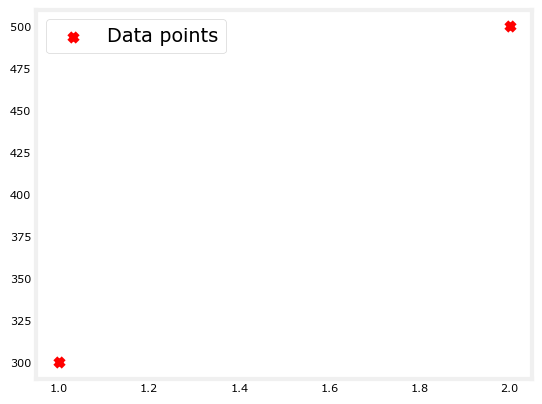

In [9]:
X_train = np.array([[1.0],[2.0]], dtype=np.float32) #1x2 matrix
y_train = np.array([[300.0], [500.0]], dtype=np.float32) #1x2 matrix

plt.scatter(X_train, y_train, marker='x', c='r', label = 'Data points')
plt.legend(fontsize = 'xx-large')
plt.ylabel("Price")